In [43]:
import os 
import sys 

sys.path.append('/mnt/data/robers/projects/TimeXer')
os.chdir('/mnt/data/robers/projects/TimeXer')

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
from utils.src.ploting import plot_data
import pickle
import torch

folder_path = '/mnt/data/robers/projects/TimeXer/playgrounds/predicted_data'

# Open batch_x, batch_y, batch_x_mark, outputs
with open(folder_path + '/batch_x.pkl', 'rb') as f:
    batch_x = pickle.load(f)

with open(folder_path + '/batch_y.pkl', 'rb') as f:
    batch_y = pickle.load(f)

with open(folder_path + '/batch_x_mark.pkl', 'rb') as f:
    batch_x_mark = pickle.load(f)

with open(folder_path + '/outputs.pkl', 'rb') as f:
    outputs = pickle.load(f)
    
print(batch_x.shape, batch_y.shape, batch_x_mark.shape, outputs.shape)

torch.Size([256, 36, 4]) torch.Size([256, 24, 1]) torch.Size([256, 36, 4]) torch.Size([256, 24, 1])


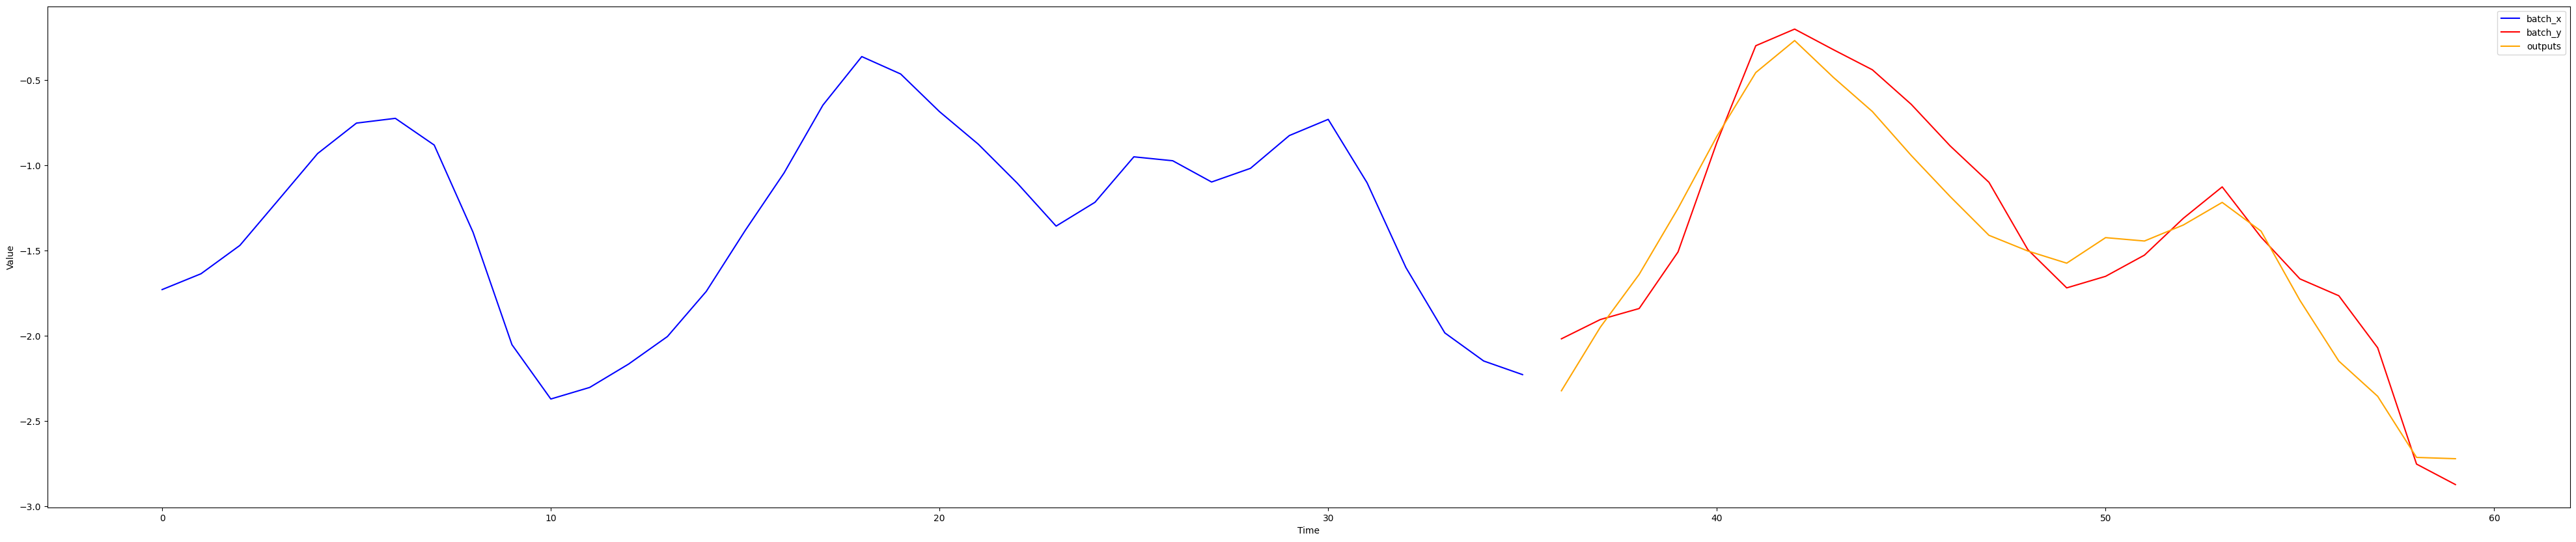

In [45]:
plot_data(batch_x, batch_y, batch_x_mark, outputs, 13)

(8737, 24, 1) (8737, 24, 1)
(8737,) (8737,)


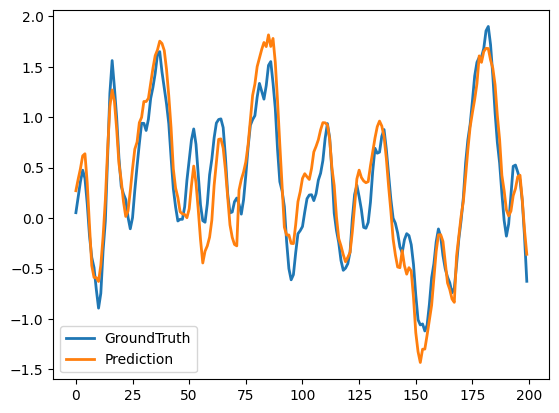

In [46]:
import numpy as np
import os

folder_path = '/mnt/data/robers/projects/TimeXer/results/long_term_forecast_NP_168_24_TimeXer_custom_ftMS_sl36_ll12_pl24_dm512_nh1_el5_dl1_df512_expand2_dc4_fc1_ebtimeF_dtTrue_test_0'
preds = os.path.join(folder_path, 'pred.npy')
true = os.path.join(folder_path, 'true.npy')

preds = np.load(preds)  
true = np.load(true)

print(preds.shape, true.shape)

import matplotlib.pyplot as plt

# create a x_axis from 0 to preds.shape[0]
x_axis = np.arange(preds.shape[0])
y_values_preds = np.zeros(preds.shape[0])
y_values_true = np.zeros(preds.shape[0])

print(y_values_preds.shape, y_values_true.shape)

for idx in range(0, preds.shape[0]-preds.shape[1], preds.shape[1]):
    # print(preds[idx][:, 0].shape, preds[idx][:, 0].shape)
    y_values_preds[idx:idx+24] = preds[idx][:, 0]
    y_values_true[idx:idx+24] = true[idx][:, 0]
    
plt.figure()
len = 200
start = 600
plt.plot(y_values_true[start:start+len], label='GroundTruth', linewidth=2)
plt.plot(y_values_preds[start:start+len], label='Prediction', linewidth=2)
plt.legend()
plt.show()